### Task 1. Linear programming

In [349]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import linprog
import math

In [350]:
forecast = [894.18289613, 808.12646583, 770.62950727, 599.66401704, 620.40585258,
 683.45520128, 696.44404567, 729.35882793, 779.0550775, 856.29647998,
 896.43289262, 909.27686609]
goal = [math.ceil(i /2)  for i in forecast]


In [351]:
h = 12

#### dictionary with workers and their costs type

In [352]:
avail_workers_and_cost = {'3': {"insurance": [300], "wage": [1000]*3 , "bonus": [0]}, '4': {"insurance": [110]*4, "wage": [900]*4 , "bonus": [0]},
               7:{"insurance": [110]*3 + [90]*4, "wage": [850]*7 , "bonus": [100]}, 5: {"insurance": [0], "wage": [950]*5 , "bonus": [450]}} 
avail_workers = [3, 4, 7, 5]

In [353]:
avail_workers_and_cost

{'3': {'insurance': [300], 'wage': [1000, 1000, 1000], 'bonus': [0]},
 '4': {'insurance': [110, 110, 110, 110],
  'wage': [900, 900, 900, 900],
  'bonus': [0]},
 7: {'insurance': [110, 110, 110, 90, 90, 90, 90],
  'wage': [850, 850, 850, 850, 850, 850, 850],
  'bonus': [100]},
 5: {'insurance': [0], 'wage': [950, 950, 950, 950, 950], 'bonus': [450]}}

In [354]:
cost = []
for worker, costs in avail_workers_and_cost.items():
    print(worker, costs)
    #print(costs['insurance'])
    temp_cost = []
    temp_cost += costs['insurance']
    temp_cost += costs['wage']
    temp_cost += costs['bonus']
    temp_cost = sum(temp_cost)
    cost.append(temp_cost)

3 {'insurance': [300], 'wage': [1000, 1000, 1000], 'bonus': [0]}
4 {'insurance': [110, 110, 110, 110], 'wage': [900, 900, 900, 900], 'bonus': [0]}
7 {'insurance': [110, 110, 110, 90, 90, 90, 90], 'wage': [850, 850, 850, 850, 850, 850, 850], 'bonus': [100]}
5 {'insurance': [0], 'wage': [950, 950, 950, 950, 950], 'bonus': [450]}


In [355]:
cost

[3300, 4040, 6740, 5200]

In [356]:
# Objective function
vec_min = np.array([i for i in cost for _ in range(h)])
vec_min

array([3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300,
       3300, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040,
       4040, 4040, 6740, 6740, 6740, 6740, 6740, 6740, 6740, 6740, 6740,
       6740, 6740, 6740, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200,
       5200, 5200, 5200, 5200])

In [357]:

A_full = np.empty((h, h * len(avail_workers)), dtype=np.int64)
for n, m in enumerate(avail_workers):
    A_temp = np.zeros((h, h), dtype=np.int64)
    for i in range(h):
        for j in range(max(0, i-m+1), min(i+1, h)):
            A_temp[i, j] = 1
    A_full[:, h * n: h * (n+1)] = A_temp
A_con = A_full[:h, :]

In [358]:
import pandas as pd
pd.DataFrame(A_con)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
6,0,0,0,0,1,1,1,0,0,0,...,1,1,1,1,1,0,0,0,0,0
7,0,0,0,0,0,1,1,1,0,0,...,0,1,1,1,1,1,0,0,0,0
8,0,0,0,0,0,0,1,1,1,0,...,0,0,1,1,1,1,1,0,0,0
9,0,0,0,0,0,0,0,1,1,1,...,0,0,0,1,1,1,1,1,0,0


In [359]:
#### Optimizer
c = vec_min
b = - np.array(goal)
A = - A_con

res = linprog(c, A, b)
print(res)

     con: array([], dtype=float64)
     fun: 4813119.99919907
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([-7.59702061e-08,  4.29999999e+01,  6.19999999e+01, -5.30625925e-08,
       -5.22137498e-08, -5.53445147e-08, -5.71959049e-08, -6.00558110e-08,
       -6.24254426e-08,  1.50043995e+01,  3.89602705e+00, -7.55993597e-08])
  status: 0
 success: True
       x: array([1.48000000e+02, 1.05363132e-11, 4.87174404e-11, 2.43871510e-11,
       1.86417386e-10, 1.02288268e-10, 7.00000000e+00, 4.00744610e-11,
       2.04838517e-11, 6.10043996e+01, 8.89162755e+00, 2.10397287e+00,
       4.49410571e-10, 3.34790518e-11, 4.55732100e-11, 1.03426271e-10,
       1.10000000e+01, 9.43143584e-11, 6.97453461e-11, 3.08973992e-11,
       3.60000000e+01, 7.80938977e-11, 8.01481131e-11, 8.15871654e-11,
       1.61109640e+02, 5.64488818e-11, 7.13358778e-11, 4.77439094e-11,
       3.26173531e-11, 1.69890360e+02, 1.71669588e-11, 5.00399152e-11,
       3.11620788e-11, 3.26632571e-

In [360]:
opt = np.asmatrix(np.ceil(res.x))
plan = opt.reshape((len(avail_workers), -1)).transpose()
result = np.asmatrix(A_con) * np.asmatrix(opt).transpose()
print(plan)
print(result)

[[148.   1. 162. 139.]
 [  1.   1.   1.   1.]
 [  1.   1.   1.   1.]
 [  1.   1.   1.   1.]
 [  1.  12.   1.   1.]
 [  1.   1. 170.   1.]
 [  7.   1.   1.   1.]
 [  1.   1.   1. 178.]
 [  1.  36.   1.   1.]
 [ 62.   1.   1.   1.]
 [  9.   1.   1.   1.]
 [  3.   1.   1.   1.]]
[[450.]
 [454.]
 [458.]
 [314.]
 [327.]
 [359.]
 [366.]
 [382.]
 [406.]
 [461.]
 [469.]
 [471.]]


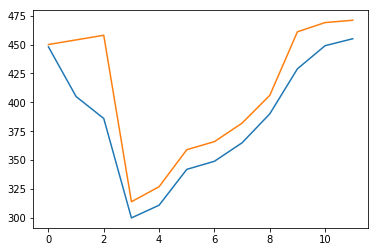

In [361]:
plt.plot(goal)
plt.plot(result)

In [362]:
### Divide for 3 and 9 months arrays

In [363]:
h = 9

In [364]:
vec_min =  np.array([i for i in cost for _ in range(h)])

In [365]:
goal[3:]

[300, 311, 342, 349, 365, 390, 429, 449, 455]

In [366]:
A_full = np.empty((h, h * len(avail_workers)), dtype=np.int64)
for n, m in enumerate(avail_workers):
    A_temp = np.zeros((h, h), dtype=np.int64)
    for i in range(h):
        for j in range(max(0, i-m+1), min(i+1, h)):
            A_temp[i, j] = 1
    A_full[:, h * n: h * (n+1)] = A_temp
A_con = A_full[:h, :]

In [367]:
import pandas as pd
pd.DataFrame(A_con)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,1,1,1,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,1,...,0,1,1,1,1,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,...,0,1,1,1,1,1,0,0,0,0
5,0,0,0,1,1,1,0,0,0,0,...,0,0,1,1,1,1,1,0,0,0
6,0,0,0,0,1,1,1,0,0,0,...,0,0,0,1,1,1,1,1,0,0
7,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,1,1,1,1,1,0
8,0,0,0,0,0,0,1,1,1,0,...,1,0,0,0,0,1,1,1,1,1


In [368]:
goal[3:]

[300, 311, 342, 349, 365, 390, 429, 449, 455]

In [369]:
#### Optimizer
c_1 = vec_min
b = - np.array(goal[3:])
A = -A_con

res = linprog(c_1, A, b)
print(res)

     con: array([], dtype=float64)
     fun: 3514719.999855331
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([-1.27989779e-08, -1.31588536e-08, -1.41943133e-08, -1.44063392e-08,
       -1.49568677e-08, -1.60722493e-08,  1.50658697e+01,  3.86541879e+00,
       -1.87989144e-08])
  status: 0
 success: True
       x: array([6.91069463e-11, 1.42238185e-10, 7.68467174e-11, 7.00000000e+00,
       3.61631700e-11, 1.55137701e-11, 6.10658697e+01, 8.79954913e+00,
       2.13458119e+00, 1.40127115e+02, 1.10000000e+01, 6.21084219e-11,
       4.59898837e-11, 2.99504606e-11, 1.95872885e+02, 4.58642969e-11,
       5.11525697e-11, 6.36094156e-11, 5.70865184e-11, 1.65811731e-11,
       3.10000000e+01, 4.63863171e-10, 2.91109558e-11, 1.61565234e-11,
       1.64171048e-11, 2.16908257e-11, 3.58394042e-11, 1.59872885e+02,
       1.81515494e-10, 1.98825462e-11, 1.72054040e-11, 1.56127115e+02,
       2.78145197e-11, 1.68160515e-11, 1.70427224e-11, 1.26072324e-11])


In [370]:
opt = np.asmatrix(np.ceil(res.x))
plan = opt.reshape((len(avail_workers), -1)).transpose()
result_1= np.asmatrix(A_con) * np.asmatrix(opt).transpose()
print(plan)
print(result_1)

[[  1. 141.   1. 160.]
 [  1.  11.   1.   1.]
 [  1.   1.  31.   1.]
 [  7.   1.   1.   1.]
 [  1.   1.   1. 157.]
 [  1. 196.   1.   1.]
 [ 62.   1.   1.   1.]
 [  9.   1.   1.   1.]
 [  3.   1.   1.   1.]]
[[303.]
 [317.]
 [351.]
 [360.]
 [378.]
 [405.]
 [461.]
 [469.]
 [471.]]


In [371]:
result = np.array(result.flatten())[0].tolist()

In [372]:
result_1 = np.array(result_1.flatten())[0].tolist()

In [373]:
new_res = result[:3] + result_1

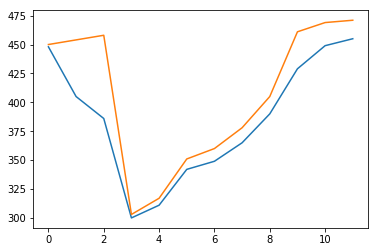

In [374]:
plt.plot(goal[:3] + goal[3:])
plt.plot(new_res)

### Conclusions

Our optimization doesn't exactly follow the "goal" curve, but still there is not the lack of workers at any point. But I decided to try to split the forecast array into two parts: 3 and 9 monthes and make and optimization again.
Because we don't have and "residuals" data about our previous workers who can quit during first monthes, we hire people in the first month for 3-month minimum contract that's why our result doesnt follow the goal during first 3 monthes, because we dont have data about anyone quitting the job during these months.
I ran the optimization algoritm starting from 4th months again and merged the results, so we see a better optimization now.

### Task 2. Non-linear programming

In [375]:
forecast = [894.18289613, 808.12646583, 770.62950727, 599.66401704, 620.40585258,
 683.45520128, 696.44404567, 729.35882793, 779.0550775, 856.29647998,
 896.43289262, 909.27686609]


In [376]:
from scipy.optimize import curve_fit, minimize

In [377]:
# Simulation function
def sim_func(x, a, b, c):
    return a * np.exp(-b * abs(x - 9)) + c

In [378]:
price = np.linspace(100, 120, 100)

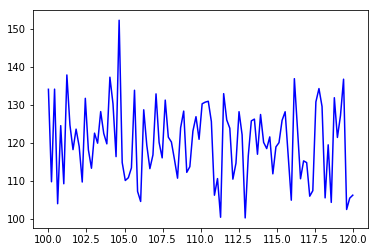

In [379]:
# Historical demand
y = sim_func(price, 70.0, 1.1, 120.0)
y_noise = 10. * np.random.normal(size=price.size)
demand = y + y_noise
plt.plot(price, demand, 'b-', label='data')

In [380]:
w = 12

In [381]:
# Prices limits
b = (100.0,140.0)
bnds = [b for _ in range(w)]
bnds

[(100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0),
 (100.0, 140.0)]

In [382]:
# Inventory limit 1800 items
def constraint(x):
    total_items = 1800.
    return total_items - sum([elasticity_func(i) for i in x])

con = {'type': 'ineq', 'fun': constraint}



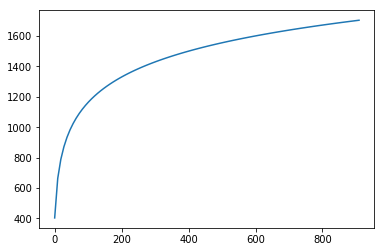

In [383]:
def inventory(x):
    a = 0.2
    return 250 * np.log(x + 5)
inv_level = np.linspace(0, max(forecast), 100)
plt.plot(inv_level, inventory(inv_level))

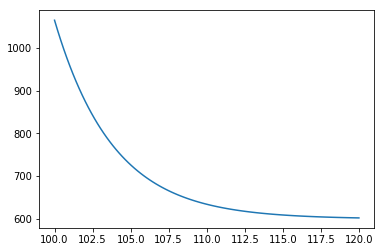

In [384]:
a = min(forecast) #min forecast
b = max(forecast) #max forecast

def elasticity_func(x):
    #print(b * np.exp(-0.26 * x) * 1e11 + a)
    return b * np.exp(-0.26 * x) * 1e11 + a

pricing_level = np.linspace(100, 120, 100)
plt.plot(pricing_level, elasticity_func(pricing_level))

In [385]:
w = 12

# Optimization function is:
def revenue(p):
#     print("PRICE", p)
#     print("DEMAND FOR THIS PRICE", elasticity_func(p))
#     print("REVENUE", p*elasticity_func(p))
    return p*elasticity_func(p)

def cost_func(ind, x):
#     print("COST")
#     print("forecast", forecast[ind], "Inventory cost", inventory(forecast[ind]))
#     print("price", x[ind])
#     print("demand from elasticity func", elasticity_func(x[ind]))
#     print("NEEd to store inventory", max(forecast[ind] - elasticity_func(x[ind]), 0))
#     print("OUR COST", inventory(max(forecast[ind] - elasticity_func(x[ind]), 0)))
    return inventory(max(forecast[ind] - elasticity_func(x[ind]), 0))

def obj(x):
#     print("X LIST:", x)
#     print("LIST of REVENUES", [revenue(i) for i in x])
#     print("LIST of COSTS", [cost_func(ind, x) for ind in range(len(x))])
#     print("OBJ", -(sum([revenue(i) for i in x]) - sum([cost_func(ind, x) for ind in range(len(x))])))
    #return -(sum([revenue(i) for i in x]) - sum([cost_func(ind, x) for ind in range(len(x))]))
    lst = []
    for ind, el in enumerate(x):
        diff = forecast[ind] - elasticity_func(el)
        if diff < 0:
            diff = 0
        inv = inventory(diff)
        lst.append(inv)
    print("LST COSTS", lst)
    costs = sum(lst)
    return -(sum([revenue(i) for i in x]) - costs)

# Sales function
def sales_function(x):
    return sum([elasticity_func(i) for i in x])

In [386]:
# initial approximation
x0 = 110. * np.ones(w)

# show initial objective
print('Initial Objective (Revenue): ' + str(-obj(x0)))

# show initial sales
print('Initial Sales: ' + str(sales_function(x0)))

LST COSTS [1394.9461546445357, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
Initial Objective (Revenue): 823750.555930317
Initial Sales: 7610.020508344064


In [387]:
x0

array([110., 110., 110., 110., 110., 110., 110., 110., 110., 110., 110.,
       110.])

In [388]:
from scipy.optimize import BFGS
from scipy.optimize import NonlinearConstraint
from scipy.optimize import rosen, rosen_der, rosen_hess, rosen_hess_prod

def cons_f(x):
    return [elasticity_func(xx) - goal[i] + margin for i, xx in enumerate(x)]


nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac='cs', hess=BFGS())

In [389]:
margin = 3.

### Optimization with linear and non-linear constraint and Rosen Der Jacobian

In [390]:
cons = ([con, nonlinear_constraint])
# Find solution
solution = minimize(obj, x0, method='SLSQP',\
                    jac=rosen_der,
                    bounds=bnds, constraints=cons,\
                    options={'maxiter': 1000, 'ftol': 1e-06, 'iprint': 1,\
                            'disp': True, 'eps': 1.4901161193847656e-08})

LST COSTS [1394.9461546445357, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
LST COSTS [402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 1437.8244736610447]
LST COSTS [1289.8329894617273, 1119.3106654706685, 980.4673743147758, 402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 555.4542843503792, 1019.0465338062909, 1228.460840965096, 1293.0441372713117, 1437.2648504251658]
LST COSTS [1363.663614477256, 1248.9440672939947, 1175.7798231083736, 402.3594781085251, 402.3594781085251, 785.1351403556421, 896.6092503306108, 1058.5990285047462, 1194.184017492767, 1319.4746257967256, 1366.0575613183555, 1433.8276005272428]
LST COSTS [1382.302130165

In [391]:
x = solution.x

# show final objective
print('Final Objective (Revenue): ' + str(-obj(x)))

# show initial sales
print('Final Sales: ' + str(sales_function(x)))

LST COSTS [1394.8482324745526, 1296.6428871443677, 1237.8227680681168, 402.3594781085251, 402.3594781085251, 998.0919986537463, 1051.8137033685018, 1151.509126090491, 1252.2967597095117, 1356.2642886443177, 1396.9626193772515, 1409.0703148140353]
Final Objective (Revenue): 823785.1211685102
Final Sales: 7610.852634845798


In [392]:
x

array([109.98844883, 109.98844883, 109.98844883, 109.98844883,
       109.98844883, 109.98844883, 109.98844883, 109.98844883,
       109.98844883, 109.98844883, 109.98844883, 110.03465351])

### Optimization with Linear and non-linear constraint

In [393]:
cons = ([con, nonlinear_constraint])
# Find solution
solution = minimize(obj, x0, method='SLSQP',\
                    bounds=bnds, constraints=cons,\
                    options={'maxiter': 1000, 'ftol': 1e-06, 'iprint': 1,\
                            'disp': True, 'eps': 1.4901161193847656e-08})

LST COSTS [1394.9461546445357, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
LST COSTS [1394.9461546445357, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
LST COSTS [1394.9461547706424, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
LST COSTS [1394.9461546445357, 1296.7879114620869, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
LST COSTS [1394

In [394]:
x = solution.x

# show final objective
print('Final Objective (Revenue): ' + str(-obj(x)))

# show initial sales
print('Final Sales: ' + str(sales_function(x)))

LST COSTS [1394.9461546445357, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
Final Objective (Revenue): 823750.555930317
Final Sales: 7610.020508344064


In [395]:
x

array([110., 110., 110., 110., 110., 110., 110., 110., 110., 110., 110.,
       110.])

In [396]:
### Three constraints

In [397]:
def constraint2(x):
    return sum(np.ceil([elasticity_func(xx) - goal[i] + margin for i, xx in enumerate(x)]))
               
con2 = {'type': 'ineq', 'fun': constraint2}

def constraint3(x):
    return sum(np.ceil([-elasticity_func(xx) + (goal[i] + margin) for i, xx in enumerate(x)]))

con3 = {'type': 'ineq', 'fun': constraint3}

In [398]:
cons = ([con, con2, con3])
# Find solution
solution = minimize(obj, x0, method='SLSQP',\
                    bounds=bnds, constraints=cons,\
                    options={'maxiter': 1000, 'ftol': 1e-06, 'iprint': 1,\
                            'disp': True, 'eps': 1.4901161193847656e-08})

LST COSTS [1394.9461546445357, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
LST COSTS [1394.9461546445357, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
LST COSTS [1394.9461547706424, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
LST COSTS [1394.9461546445357, 1296.7879114620869, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
LST COSTS [1394

In [399]:
x = solution.x

# show final objective
print('Final Objective (Revenue): ' + str(-obj(x)))

# show initial sales
print('Final Sales: ' + str(sales_function(x)))

LST COSTS [1425.5325618168474, 402.3594781085251, 402.3594781085251, 402.3594781085251, 811.8920336872189, 402.3594781085251, 402.3594781085251, 402.3594781085251, 402.3594781085251, 1391.7216665965595, 1427.4036400054513, 1437.8244733337922]
Final Objective (Revenue): 1128066.8642890253
Final Sales: 9929.821326635598


In [400]:
x

array([139.99988816, 100.00205694, 100.00203976, 139.99988798,
       139.99988798, 100.15562425, 100.14036628, 100.149971  ,
       100.0020447 , 139.99988796, 139.99988797, 139.99988797])

In [401]:
### Three constraing and jacobian


In [402]:
solution = minimize(obj, x0, method='SLSQP',\
                    bounds=bnds, constraints=cons, jac=rosen_der,\
                    options={'maxiter': 1000, 'ftol': 1e-06, 'iprint': 1,\
                            'disp': True, 'eps': 1.4901161193847656e-08})

LST COSTS [1394.9461546445357, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -823750.555930317
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1


In [403]:
x = solution.x

# show final objective
print('Final Objective (Revenue): ' + str(-obj(x)))

# show initial sales
print('Final Sales: ' + str(sales_function(x)))

LST COSTS [1394.9461546445357, 1296.787911275339, 1238.0062477077993, 402.3594781085251, 402.3594781085251, 998.5703936879946, 1052.1996638274359, 1151.7682242578587, 1252.4699218487858, 1356.378548589868, 1397.0597170182893, 1408.7942484547552]
Final Objective (Revenue): 823750.555930317
Final Sales: 7610.020508344064


In [404]:
x

array([110., 110., 110., 110., 110., 110., 110., 110., 110., 110., 110.,
       110.])

### Conclusions

When using optimization with linear and non-linear constraints with Rosen der jacobian we hit revenue of 1128066 which is our best result and we got all array of prices around 110, while having bound [100, 140]

This revenue we also achieve with optimization with three constraints, but with different array of prices which consist either of maximum price or minimum price which means that the algorithm suggest hitting with the minimum (a) demand which people will always have and getting the biggest revenue setting the highest possible price and insignificant costs for inventory (because we have huge revenue and our elasticity for inventory storage is not growing fast, so the costs we pay are insignifactly small to compare with revenue) or sell more with the smallest price and avoid costs therefore.

